# 1. 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기


## 4,000개의 데이터셋에서 강아지와 고양이 이미지를 분류

> https://www.kaggle.com/c/dogs-vs-cats/data

* 2,000개는 강아지(=1), 2,000개는 고양이(=0)
* 2,000개의 훈련 이미지
    * 처음 1,000개의 고양이 이미지
    * 처음 1,000개의 강아지 이미지
* 1,000개의 검증 이미지
    * 다음 500개의 고양이 이미지
    * 다음 500개의 강아지 이미지
* 1,000개의 테스트 이미지
    * 다음 500개의 고양이 이미지 
    * 다음 500개의 강아지 이미지 


## 작은 데이터셋에서 이미지 분류 문제를 수행할 때에는 다음을 거쳐야 한다.
1) 처음부터 작은 모델을 훈련하기 (acc=71%)
  * 주요 issue: 과대적합
  * 데이터 증식(data augmentation)으로 해결 및 정확도를 향상
  
2) 사전 훈련된 모델을 사용하여 특성 추출하기 (acc=90%)

3) 사전 훈련된 모델을 세밀하게 튜닝하기 (acc=92%)

## 작은 데이터셋 문제에서 딥러닝의 타당성

* 컨브넷은 지역적이고 평행 이동으로 변하지 않는 특성을 학습하므로, 지각에 관한 문제에서 매우 효율적으로 데이터를 사용한다.
* 모델이 작고 규제가 잘 되어 있으며 간단한 작업이라면, 매우 작은 이미지 데이터셋에서 특성 공학을 사용하지 않고 컨브넷을 처음부터 훈련해도 납득할 만한 결과를 만들 수 있다.

In [1]:
import os, shutil

original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')  # ./datasets/cats_and_dogs_small/train
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')  # ./datasets/cats_and_dogs_small/validation
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')  # ./datasets/cats_and_dogs_small/test
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')  # ./datasets/cats_and_dogs_small/train/cats
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


# 훈련용 고양이 이미지 복사 (1000)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)  # ./datasets/cats_and_dogs_small/train/cats/cat.0.jpg
    shutil.copyfile(src, dst)

# 검증용 고양이 이미지 복사 (500)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 테스트용 고양이 이미지 복사 (500)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
    
# 훈련용 강아지 이미지 복사 (1000)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 검증용 강아지 이미지 복사 (500)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)    
    
# 테스트용 강아지 이미지 복사 (500)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [3]:
### 네트워크 구성하기


from keras import layers
from keras import models

# 특성 맵의 깊이는 네트워크에서 32에서 128까지 점진적으로 증가
# 특성 맵의 크기는 점진적으로 감소하게 됨 (150x150에서 7x7까지)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype

/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("q

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
### 데이터 전처리

# 1. 사진 파일 읽기
# 2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩
# 3. 부동 소수 타입의 텐서로 변환
# 4. 픽셀 값(0-255)의 스케일을 [0, 1] 사이로 조정


# ImageDataGenerator를 사용하여 이 단계들을 자동으로 처리
# ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어 주는 파이썬 제너레이터(generator)를 만들어 준다.
# 파이썬 제너레이터는 iterator처럼 작동하는 개체로, for ... in 연산자에 사용할 수 있음

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 각 제너레이터는 150x150 RGB 이미지의 배치(20, 150, 150, 3)와 이진 레이블의 배치(20, )를 출력함
# 각 배치에는 20개의 샘플(= batch_size)이 존재함
# 이진 분류이므로 class_mode='binary'를 사용 => 0 또는 1로 채워진 1차원 배열을 반환
# train_dir 경로의 하위 폴더(cat, dog)에 따라 자동으로 이진 분류 라벨링됨
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# 제너레이터는 타깃 폴더에 있는 이미지를 끝없이 반복하며 이 배치를 무한정 만들어내므로, break 문을 사용함
for data_batch, labels_batch in train_generator :
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [8]:
# 배치 제너레이터를 사용하여 모델 훈련하기

# fit_generator 메서드는 fit 메서드와 동일하되, 데이터 제너레이터를 사용할 수 있다.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  # 2,000개의 샘플 / 배치사이즈 20 = 100
    epochs=30,
    validation_data=validation_generator,  # 데이터 제너레이터 혹은 numpy 배열의 튜플
    validation_steps=50)  # 검증 데이터 제너레이터에서 얼마나 많은 배치를 추출하여 평가할지 지정 (무한정 X)


Epoch 1/30
100/100 [==============================] - 34s 344ms/step - loss: 0.6849 - acc: 0.5515 - val_loss: 0.6746 - val_acc: 0.5340
Epoch 2/30
100/100 [==============================] - 35s 351ms/step - loss: 0.6549 - acc: 0.6115 - val_loss: 0.6363 - val_acc: 0.6160
Epoch 3/30
100/100 [==============================] - 37s 369ms/step - loss: 0.5966 - acc: 0.6730 - val_loss: 0.6094 - val_acc: 0.6760
Epoch 4/30
100/100 [==============================] - 33s 333ms/step - loss: 0.5604 - acc: 0.7065 - val_loss: 0.5895 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 33s 329ms/step - loss: 0.5301 - acc: 0.7350 - val_loss: 0.6358 - val_acc: 0.6630
Epoch 6/30
100/100 [==============================] - 33s 326ms/step - loss: 0.5129 - acc: 0.7415 - val_loss: 0.5620 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 33s 332ms/step - loss: 0.4895 - acc: 0.7555 - val_loss: 0.5524 - val_acc: 0.7110
Epoch 8/30
100/100 [==============================] - 

In [9]:
model.save('cats_and_dogs_small_1.h5')

In [12]:
import matplotlib.pyplot as plt

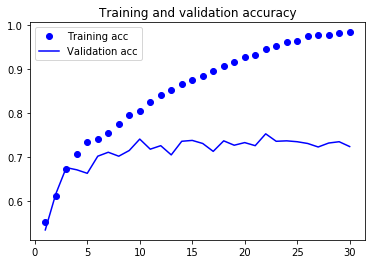

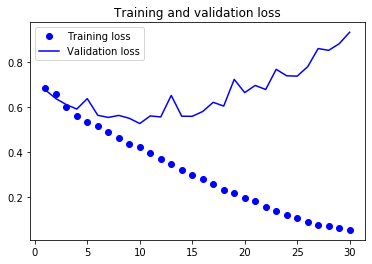

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 위 그래프는 과대적합의 특성을 보여 준다.

* 정확도
    * 훈련 정확도는 시간이 지남에 따라 선형적으로 증가해 거의 100%에 도달
    * 반면, 검증 정확도는 70~72%에서 멈춤

* 손실
    * 검증 손실은 다섯 번의 epoch만에 최솟값에 다다른 이후, 더 이상 진전되지 않음
    * 반면, 훈련 손실은 거의 0에 도달할 때까지 선형적으로 계속 감소함

* 훈련 샘플의 수가 2,000개로 비교적 적기 때문에 과대적합이 가장 중요한 문제이다.
* 여기에서는 컴퓨터 비전에 특화되어 있어 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 방법인 **데이터 증식**을 시도해 본다.
    * 기존 훈련 샘플로부터 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용해 샘플을 늘림
    * 훈련할 때 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표

In [14]:
# ImageDataGenerator를 사용하여 데이터 증식 설정하기

datagen = ImageDataGenerator(
    rotation_range=20,  # 랜덤하게 사진을 회전시킬 각도의 범위를 설정(0~180 사이) => (-rotation_range ~ +rotation_range)
    width_shift_range=0.1,  # 사진을 수평으로 랜덤하게 평행이동시킬 범위를 설정 (전체 너비에 대한 비율) => 실수일 경우 [-width_shift_range, +width_shift_range]
    height_shift_range=0.1,  # 사진을 수직으로 랜덤하게 평행이동시킬 범위를 설정 (전체 높이에 대한 비율)
    shear_range=0.1,  # 랜덤하게 전단 변환(shearing transform)을 적용할 각도의 범위를 설정: rotation_range로 회전할 때, y축 방향으로 각도를 증가시킴
    zoom_range=0.1,  # 랜덤하게 사진을 확대할 범위를 설정 => 실수일 경우 1-zoom_range ~ 1+zoom_range
    horizontal_flip=True,  # 랜덤하게 이미지를 수평으로 뒤집음 (풍경/인물 등 수평 대칭을 가정할 수 있을 때 사용)
    fill_mode='nearest'  # 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략을 설정
)

['./datasets/cats_and_dogs_small/train/cats/cat.0.jpg', './datasets/cats_and_dogs_small/train/cats/cat.1.jpg', './datasets/cats_and_dogs_small/train/cats/cat.10.jpg', './datasets/cats_and_dogs_small/train/cats/cat.100.jpg', './datasets/cats_and_dogs_small/train/cats/cat.101.jpg', './datasets/cats_and_dogs_small/train/cats/cat.102.jpg', './datasets/cats_and_dogs_small/train/cats/cat.103.jpg', './datasets/cats_and_dogs_small/train/cats/cat.104.jpg', './datasets/cats_and_dogs_small/train/cats/cat.105.jpg', './datasets/cats_and_dogs_small/train/cats/cat.106.jpg', './datasets/cats_and_dogs_small/train/cats/cat.107.jpg', './datasets/cats_and_dogs_small/train/cats/cat.108.jpg', './datasets/cats_and_dogs_small/train/cats/cat.109.jpg', './datasets/cats_and_dogs_small/train/cats/cat.11.jpg', './datasets/cats_and_dogs_small/train/cats/cat.110.jpg', './datasets/cats_and_dogs_small/train/cats/cat.111.jpg', './datasets/cats_and_dogs_small/train/cats/cat.112.jpg', './datasets/cats_and_dogs_small/trai

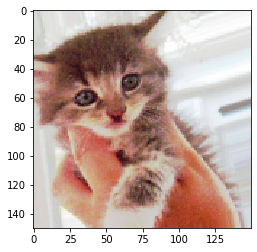

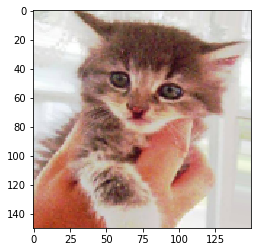

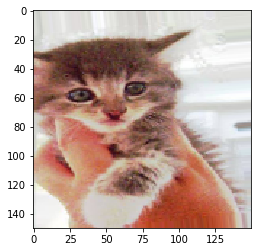

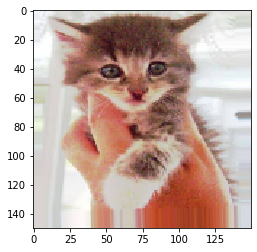

In [15]:
# 랜덤하게 증식된 훈련 이미지 그리기

from keras.preprocessing import image  # 이미지 전처리 유틸리티 모듈

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]) 
print(fnames)

img_path = fnames[3]  # 증식할 이미지 선택

img = image.load_img(img_path, target_size=(150, 150))  # 이미지를 읽고, 크기를 변경

x = image.img_to_array(img)  # 이미지를 (150, 150, 3) 크기의 numpy 배열로 변환
x = x.reshape((1, ) + x.shape)  # (1, 150, 150, 3) 크기로 변환
print(x)

i = 0
for batch in datagen.flow(x, batch_size=1) :
    plt.figure(i)  # 새로운 figure 생성
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()  # 생성된 모든 figure들을 보여주기

## 과대적합을 더 억제하기

* 데이터 증식을 사용하여 새로운 네트워크를 훈련시킬 때, 네트워크에 같은 입력 데이터가 두 번 주입되지는 않는다.
* 그러나, 적은 수의 원본 이미지에서 생성되었기 때문에 여전히 입력 데이터들 간에 상호 연관성이 크다.
    * 새로운 정보를 생성하는 것이 아닌, 기존 정보의 재조합만 가능함
    * 따라서, 완전히 과대적합을 제거하기에는 충분하지 않을 수 있음
* **과대적합을 더 억제하기 위해, 완전 연결 분류기 직전에 Dropout 층을 추가하자.**

In [16]:
# 드롭아웃을 포함한 새로운 컨브넷 정의하기

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
###
model.add(layers.Dropout(0.5))
###
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
# 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)  # 검증 데이터는 증식되어서는 안 됨!
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=100, 
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 56s 561ms/step - loss: 0.6939 - acc: 0.5241 - val_loss: 0.6821 - val_acc: 0.5704
Epoch 2/100
100/100 [==============================] - 54s 538ms/step - loss: 0.6752 - acc: 0.5759 - val_loss: 0.7044 - val_acc: 0.5625
Epoch 3/100
100/100 [==============================] - 52s 517ms/step - loss: 0.6655 - acc: 0.5838 - val_loss: 0.6408 - val_acc: 0.6110
Epoch 4/100
100/100 [==============================] - 54s 537ms/step - loss: 0.6424 - acc: 0.6188 - val_loss: 0.6174 - val_acc: 0.6669
Epoch 5/100
100/100 [==============================] - 52s 521ms/step - loss: 0.6264 - acc: 0.6403 - val_loss: 0.6110 - val_acc: 0.6371
Epoch 6/100
100/100 [==============================] - 54s 544ms/step - loss: 0.6134 - acc: 0.6572 - val_loss: 0.6603 - val_acc: 0.5973
Epoch 7/100
100/100 [==============================] - 234s 2s/step - loss: 0.5895 - acc: 0.6813 - v

100/100 [==============================] - 53s 531ms/step - loss: 0.4157 - acc: 0.8125 - val_loss: 0.4192 - val_acc: 0.8103
Epoch 61/100
100/100 [==============================] - 52s 519ms/step - loss: 0.4011 - acc: 0.8197 - val_loss: 0.4647 - val_acc: 0.7874
Epoch 62/100
100/100 [==============================] - 53s 533ms/step - loss: 0.3912 - acc: 0.8194 - val_loss: 0.4366 - val_acc: 0.8109
Epoch 63/100
100/100 [==============================] - 52s 522ms/step - loss: 0.3937 - acc: 0.8216 - val_loss: 0.4215 - val_acc: 0.8093
Epoch 64/100
100/100 [==============================] - 52s 516ms/step - loss: 0.4002 - acc: 0.8159 - val_loss: 0.4364 - val_acc: 0.8048
Epoch 65/100
100/100 [==============================] - 52s 522ms/step - loss: 0.4066 - acc: 0.8138 - val_loss: 0.4357 - val_acc: 0.7963
Epoch 66/100
100/100 [==============================] - 51s 513ms/step - loss: 0.3820 - acc: 0.8313 - val_loss: 0.4559 - val_acc: 0.8015
Epoch 67/100
100/100 [==============================] 

In [18]:
model.save('cats_and_dogs_small_2.h5')

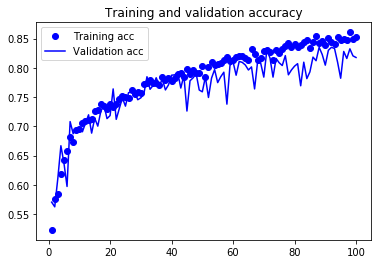

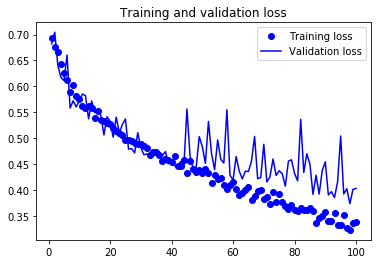

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 2. 사전 훈련된 컨브넷 사용하기